In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [4]:
print(G)

Graph with 4 nodes and 4 edges


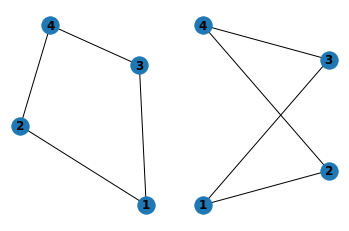

In [5]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

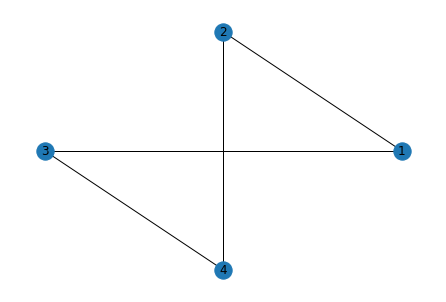

In [6]:
plt.clf()
nx.draw_circular(G, with_labels=True)
plt.show()

{(1, 2): Text(-0.3921302185963713, -0.06863116319021612, '0.125'),
 (1, 3): Text(0.10886200855364139, -0.7840631732700303, '0.75'),
 (2, 4): Text(-0.10886200855364137, 0.7840631732700303, '1.2'),
 (3, 4): Text(0.3921302185963713, 0.06863116319021606, '0.375')}

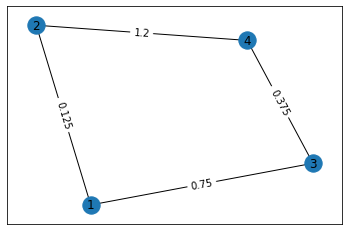

In [7]:
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [8]:
G.nodes()

NodeView((1, 2, 3, 4))

In [9]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 4), (3, 4)])

In [10]:
nx.info(G, 1)

'Node 1 has the following properties:\nDegree: 2\nNeighbors: 2 3'

In [11]:
G.degree(1)

2

In [12]:
nx.degree_centrality(G)

{1: 0.6666666666666666,
 2: 0.6666666666666666,
 3: 0.6666666666666666,
 4: 0.6666666666666666}

In [13]:
nx.is_connected(G)

True

In [14]:
G.add_node('z')

In [15]:
nx.is_connected(G)

False

In [16]:
nx.number_connected_components(G)

2

In [17]:
list(nx.connected_components(G))

[{1, 2, 3, 4}, {'z'}]

In [18]:
nx.has_path(G, 1, 2)

True

In [19]:
nx.shortest_path(G, 2, 3)

[2, 1, 3]

In [20]:
nx.shortest_path(G, 2, 'z')

NetworkXNoPath: No path between 2 and z.

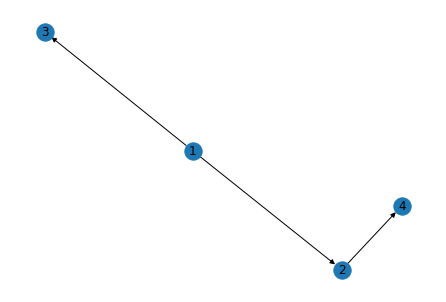

In [21]:
nx.draw(nx.bfs_tree(G, 1), with_labels = True)

In [22]:
# add a label to a node
G.nodes[1]['visited'] == True

# for loop through all the nodes --> to be fixed
for node in G.nodes()
    if 'visited' in list(G.nodes[nodes]):
        continue
    G.nodes[node]['visited'] == True

SyntaxError: invalid syntax (Temp/ipykernel_16832/279510306.py, line 5)

In [23]:
# save graph to a file
nx.write_gml(G, 'graph_example.gml')

In [24]:
a = nx.Graph()

In [25]:
a.add_edge(1, 2, weight = 1.5)

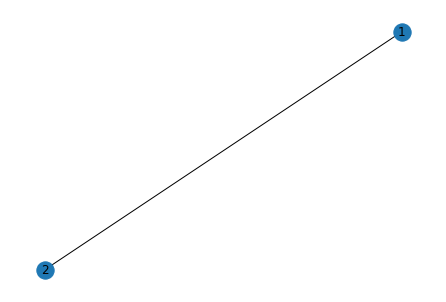

In [26]:
plt.clf()
nx.draw_circular(a, with_labels=True)
plt.show()

In [27]:
a.edges(data = True)

EdgeDataView([(1, 2, {'weight': 1.5})])

In [28]:
a[2][1]['weight'] += 3

In [29]:
a.edges(data = True)

EdgeDataView([(1, 2, {'weight': 4.5})])

In [30]:
G = 

SyntaxError: invalid syntax (Temp/ipykernel_16832/897335687.py, line 1)

In [31]:
al = nx.generate_adjlist(G, delimiter="->")

In [32]:
for line in al:
    print(line)

1->2->3
2->4
3->4
4
z


In [33]:
for node in G.edges():
    print(node)

(1, 2)
(1, 3)
(2, 4)
(3, 4)


In [34]:
d = nx.to_dict_of_dicts(G)

In [35]:
d

{1: {2: {'weight': 0.125}, 3: {'weight': 0.75}},
 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}},
 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}},
 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}},
 'z': {}}

In [36]:
G.is_directed()

False

In [37]:
a.is_directed()

False

In [38]:
def directed(dict_graph):
    direct = False
    for node, neighbours in dict_graph.items():
        for neighbour in list(neighbours.keys()):
            print(node)
            print(list(dict_graph[neighbour].keys()))
            if node not in list(dict_graph[neighbour].keys()):
                direct = True
                print("si")
                break
    return direct

In [39]:
d_a = nx.to_dict_of_dicts(a)

In [40]:
d_a

{1: {2: {'weight': 4.5}}, 2: {1: {'weight': 4.5}}}

In [41]:
print(directed(d_a))

1
[1]
2
[2]
False


In [42]:
def n_users(dict_graph):
    return len(dict_graph)

In [43]:
def n_interactions(dict_graph):
    n_int = 0
    for neighbour in dict_graph.values():
        n_int += len(list(neighbour.keys()))
    return n_int

In [44]:
n_interactions(d)

8

In [45]:
n_users(d)

5

In [46]:
def average_n_links(dict_graph):
    return n_interactions(dict_graph)/n_users(dict_graph)

In [47]:
average_n_links(d)

1.6

In [48]:
def degree(dict_graph, node):
    return len(list(dict_graph[node].values()))

In [49]:
degree(d, "z")

0

In [72]:
def get_outgoing_edges(dict_graph, node):
    return list(dict_graph[node].keys())

In [110]:
# Input: a graph as a dict of dicts, the start node
# Output: a dictionary like this --> {node_1: (visited_1, dist_1), node_2: (visited_2, dist_2), . . . , node_n: (visited_n, dist_n)}

def shortest_path_Dijkstra(dict_graph, node):
    
    # Initialize two dictionaries to track visited nodes and weights
    nodes_dist = dict.fromkeys(dict_graph.keys(), float('inf'))
    
    # Initialize another dictionary that track the nodes in the shortest path
    previous_nodes = dict.fromkeys(dict_graph.keys())
    
    # Create a list of the unvisited nodes 
    unvisited = list(dict_graph.keys())
    
    # First update on the selected node
    nodes_dist[node] = 0
    
    # Start iterating until each node is visited
    while(unvisited):
        
        # Select the current min_node with a for-loop
        min_node = None
        for n in unvisited:
            if min_node == None:
                min_node = n
            elif nodes_dist[n] < nodes_dist[min_node]:
                min_node = n
            
        # Update distances of the current min_node's neighbors
        neighbors = get_outgoing_edges(dict_graph, min_node)
        for neighbor in neighbors:
            # Calculate the possible update to the shortest path and check if it is < then the actual distance
            possible_update = nodes_dist[min_node] + dict_graph[min_node][neighbor]['weight']
            if possible_update < nodes_dist[neighbor]:
                nodes_dist[neighbor] = possible_update
                # We also update the best path to the current node
                previous_nodes[neighbor] = min_node
        
        # Remove the current min_node from the unvisited list
        unvisited.remove(min_node)
    
    return previous_nodes, nodes_dist

In [78]:
get_outgoing_edges(d, 1)

[2, 3]

In [111]:
p_nodes, distanze = shortest_path_Dijkstra(d, 1)

In [112]:
print(p_nodes)

{1: None, 2: 1, 3: 1, 4: 3, 'z': None}


In [113]:
print(distanze)

{1: 0, 2: 0.125, 3: 0.75, 4: 1.125, 'z': inf}


In [82]:
d[1][2]['weight']

0.125

In [118]:
oo = [1,2,3]
distanze[oo]

TypeError: unhashable type: 'list'

In [106]:
infinito = float('inf')

In [122]:
lista = list(d.keys())

In [124]:
lista.remove(3)

In [125]:
lista

[1, 2, 4, 'z']